# Collatz conjecture


The Collatz conjecture is a conjecture in mathematics named after Lothar Collatz. It concerns a sequence defined as follows: 

* Start with any positive integer $n$.

* Then each term is obtained from the previous term as follows: 

    - If the previous term is even, the next term is one half the previous term. 
    - Otherwise, the next term is 3 times the previous term plus 1.

The conjecture is that **no matter what value of $n$, the sequence will always reach 1.**

In modular arithmetic notation, define the function $f$ as follows:

$$ f(n)={\begin{cases}n/2&{\text{if }}n\equiv 0{\pmod {2}}\\3n+1&{\text{if }}n\equiv 1{\pmod {2}}.\end{cases}} $$

Now form a sequence by performing this operation repeatedly, beginning with any positive integer, and taking the result at each step as the input at the next.

>Mathematics may not be ready for such problems.
<div class=col-md-8 style="text-align: right">_Paul Erdős_</div>

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

sns.set_style('white')
%matplotlib inline

In [5]:
def is_odd(num):
    return num % 2 != 0

def collatz(n):
    
    if n == 0:
        raise ValueError('cannot start from 0')
        
    seq = [n]
    
    while seq[-1] != 1:
        
        if is_odd(seq[-1]):
            seq.append(3*seq[-1]+1)
            
        else:
            seq.append(seq[-1]//2)

    return seq        

Generate sequences for 100.000 random integers between 20.000 and 3.000.000 :

In [7]:
numbers = np.random.randint(20000,3000000, 100000, dtype='int64')
lst_coll = [collatz(x) for x in numbers]

# length of each sequence
lengs = [len(x) for x in lst_coll]

Sequence length distribution:

Text(0.5,1,'colatz lengths')

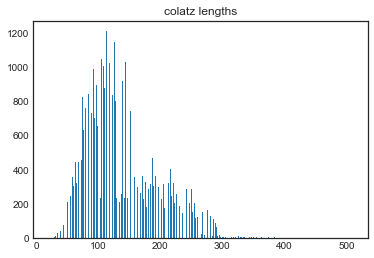

In [8]:
plt.hist(lengs, bins= 1000)
plt.title('colatz lengths')

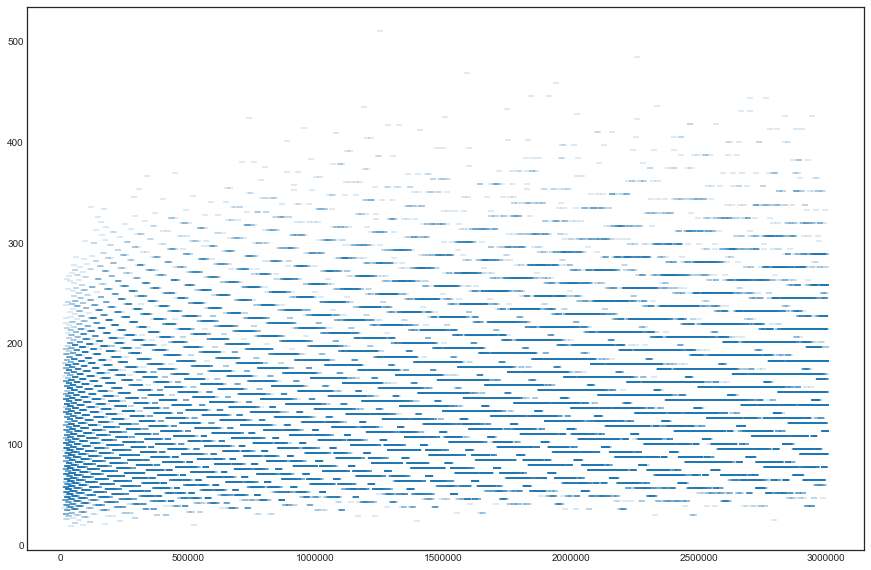

In [9]:
plt.figure(figsize=(15, 10))
plt.scatter(numbers, lengs, marker='_', c='C0', alpha = 0.2)

Means of the sequences:

(0, 1000)

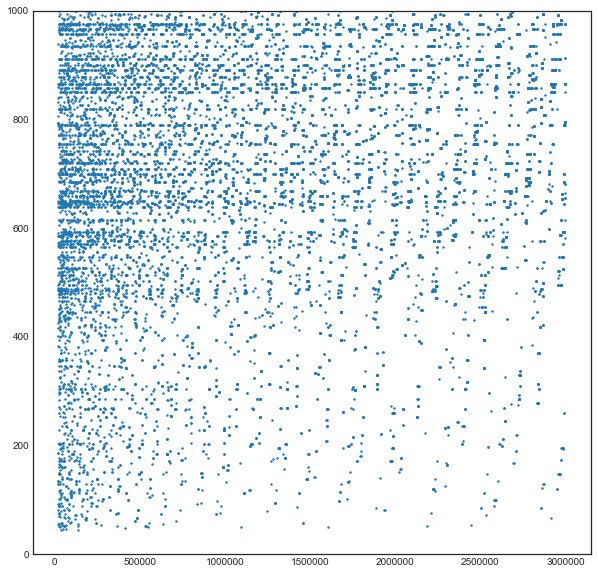

In [10]:
mean_seq = [np.median(x) for x in lst_coll]

plt.figure(figsize=(10, 10))
plt.scatter(numbers, mean_seq, s = 2)
plt.ylim(0,1000)

Generate sequences for numbers ranging from 10 to 10.000

In [12]:
# Si volem una sola llista de tuples:
# max_num = list(zip(nrange,max_num))

n_seq = np.arange(10,10000)
seq_coll = [collatz(x) for x in n_seq]
max_seq = [max(x) for x in seq_coll]

Plot of the the max number in each sequence for each starting number:

(0, 100000)

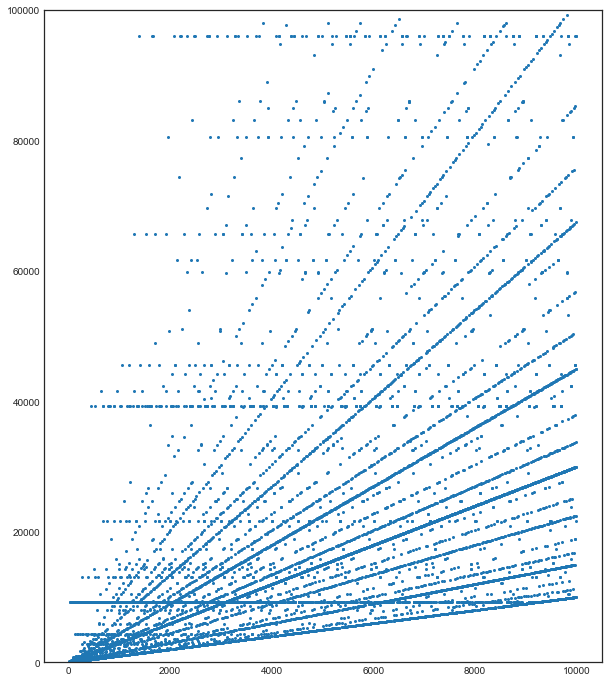

In [13]:
plt.figure(figsize=(10, 12))
plt.scatter(n_seq, max_seq, s = 4)
plt.ylim(0,100000)

(0, 2000)

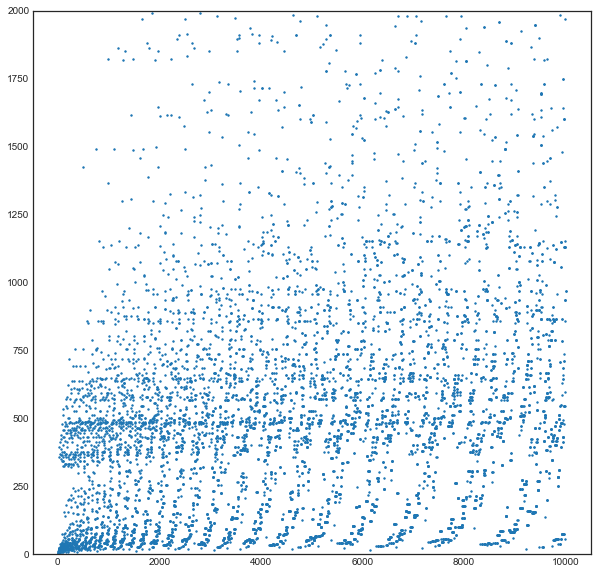

In [16]:
mean_seq = [np.median(x) for x in seq_coll]

plt.figure(figsize=(10, 10))
plt.scatter(n_seq, mean_seq, s = 2)
plt.ylim(0,2000)

## Reverse Collatz relation

There is another approach to prove the conjecture, which considers the bottom-up method of growing the so-called Collatz graph. The Collatz graph is a graph defined by the inverse relation.

$$ R(n)={\begin{cases}\{2n\}&{\text{if }}n\equiv 0,1,2,3,5\\\{2n,(n-1)/3\}&{\text{if }}n\equiv 4\end{cases}}{\pmod {6}}. $$

Instead of proving that all positive integers eventually lead to 1, we can try to prove that **1 leads to all positive integers**.

In [17]:
def odd_above(n):
    return n % 6 == 4

In [62]:
bigNumber = 1000
oddDegChange = 1.2
evenDegChange = -0.54

oddradchange = oddDegChange * np.pi / 180
evenradchange = evenDegChange * np.pi / 180

lst = weigth = np.zeros(bigNumber, dtype='int')

In [56]:


def reverse_collatz(size):
    level = [1] 
    results = {} 

    for c in range(size):
        newlevel = set() # This will be the set of numbers in the level above us
        for x in level: # We now loop through each number in our current level 
            if (x-4)%6 == 0:
                odd = (x-1)//3
            else:
                odd = 0
            #odd = (x-1)/3 if not (x-4)%6 else 0
            if odd > 1: # We don't want 1 (the root) or 0 (no odd found)
                newlevel.add(odd) # Put this into the next level
                results[odd] = x # Add a relationship to the graph
            newlevel.add(x*2); # There will always be an even number above us
            results[x*2] = x # Add a relationship to the graph
        level = newlevel #next level
    return x, results

In [84]:
x, results = reverse_collatz(18)

In [85]:
graph = nx.Graph()
for x in results:
    graph.add_node(x, value=x)
    graph.add_edge(x, results[x])

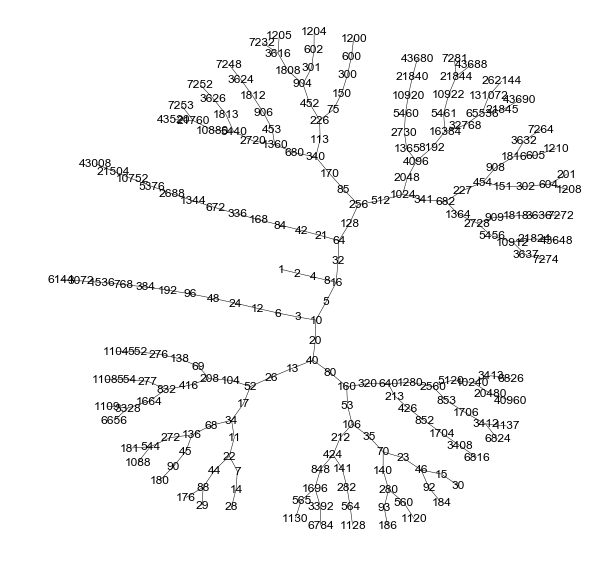

In [90]:
plt.figure(figsize=(10,10))
nx.draw_networkx_labels(graph, pos=nx.kamada_kawai_layout(graph))
nx.draw_kamada_kawai(graph, node_size=0, width=0.5)

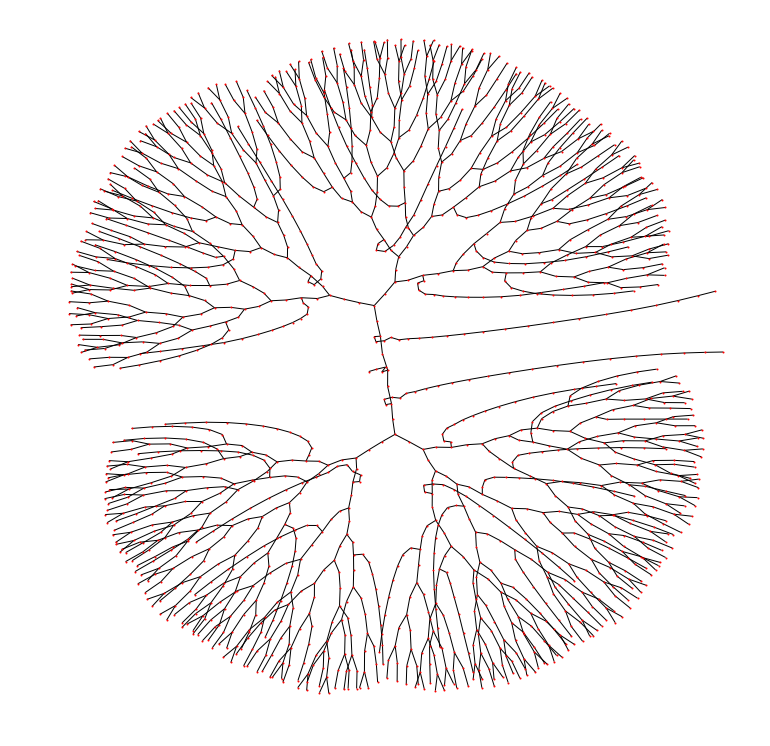

In [52]:
plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(graph, node_size=1)

In [53]:
results

{2: 1,
 4: 2,
 8: 4,
 16: 8,
 5.0: 16,
 32: 16,
 64: 32,
 10.0: 5.0,
 21.0: 64,
 128: 64,
 3.0: 10.0,
 20.0: 10.0,
 256: 128,
 6.0: 3.0,
 40.0: 20.0,
 42.0: 21.0,
 85.0: 256,
 512: 256,
 13.0: 40.0,
 80.0: 40.0,
 84.0: 42.0,
 12.0: 6.0,
 1024: 512,
 24.0: 12.0,
 26.0: 13.0,
 160.0: 80.0,
 168.0: 84.0,
 170.0: 85.0,
 341.0: 1024,
 2048: 1024,
 53.0: 160.0,
 320.0: 160.0,
 336.0: 168.0,
 340.0: 170.0,
 48.0: 24.0,
 52.0: 26.0,
 4096: 2048,
 640.0: 320.0,
 672.0: 336.0,
 96.0: 48.0,
 113.0: 340.0,
 680.0: 340.0,
 106.0: 53.0,
 682.0: 341.0,
 17.0: 52.0,
 104.0: 52.0,
 1365.0: 4096,
 8192: 4096,
 192.0: 96.0,
 213.0: 640.0,
 1280.0: 640.0,
 1344.0: 672.0,
 1360.0: 680.0,
 208.0: 104.0,
 35.0: 106.0,
 212.0: 106.0,
 227.0: 682.0,
 1364.0: 682.0,
 226.0: 113.0,
 34.0: 17.0,
 16384: 8192,
 2560.0: 1280.0,
 384.0: 192.0,
 2688.0: 1344.0,
 70.0: 35.0,
 454.0: 227.0,
 75.0: 226.0,
 452.0: 226.0,
 11.0: 34.0,
 68.0: 34.0,
 453.0: 1360.0,
 2720.0: 1360.0,
 69.0: 208.0,
 416.0: 208.0,
 424.0: 212.0

In [11]:
import datashader as ds
import datashader.transfer_functions as tf
from datashader.layout import random_layout, circular_layout, forceatlas2_layout
from datashader.bundling import connect_edges, hammer_bundle

from itertools import chain

In [12]:
cvsopts = dict(plot_height=800, plot_width=800)

def nodesplot(nodes, name=None, canvas=None, cat=None):
    canvas = ds.Canvas(**cvsopts) if canvas is None else canvas
    aggregator=None if cat is None else ds.count_cat(cat)
    agg=canvas.points(nodes,'x','y',aggregator)
    return tf.spread(tf.shade(agg, cmap=["#FF3333"]), px=1, name=name)

def edgesplot(edges, name=None, canvas=None):
    canvas = ds.Canvas(**cvsopts) if canvas is None else canvas
    return tf.shade(canvas.line(edges, 'x','y', agg=ds.count()), name=name)
    
def graphplot(nodes, edges, name="", canvas=None, cat=None):
    if canvas is None:
        xr = nodes.x.min(), nodes.x.max()
        yr = nodes.y.min(), nodes.y.max()
        canvas = ds.Canvas(**cvsopts, x_range=xr, y_range=yr)
        
    np = nodesplot(nodes, name + " nodes", canvas, cat)
    ep = edgesplot(edges, name + " edges", canvas)
    return tf.stack(ep, np, how="over", name=name)

In [13]:
edges = pd.DataFrame(list(graph.edges), columns=['source', 'target'])
nodes = pd.DataFrame(list(graph.nodes), columns=['name'])

fd = forceatlas2_layout(nodes, edges)

In [14]:
fd_d = graphplot(fd, connect_edges(fd,edges), "Force-directed") 

In [15]:
fd_b = graphplot(fd, hammer_bundle(fd,edges), "Force-directed, bundled") 

Force-directed,"Force-directed, bundled"

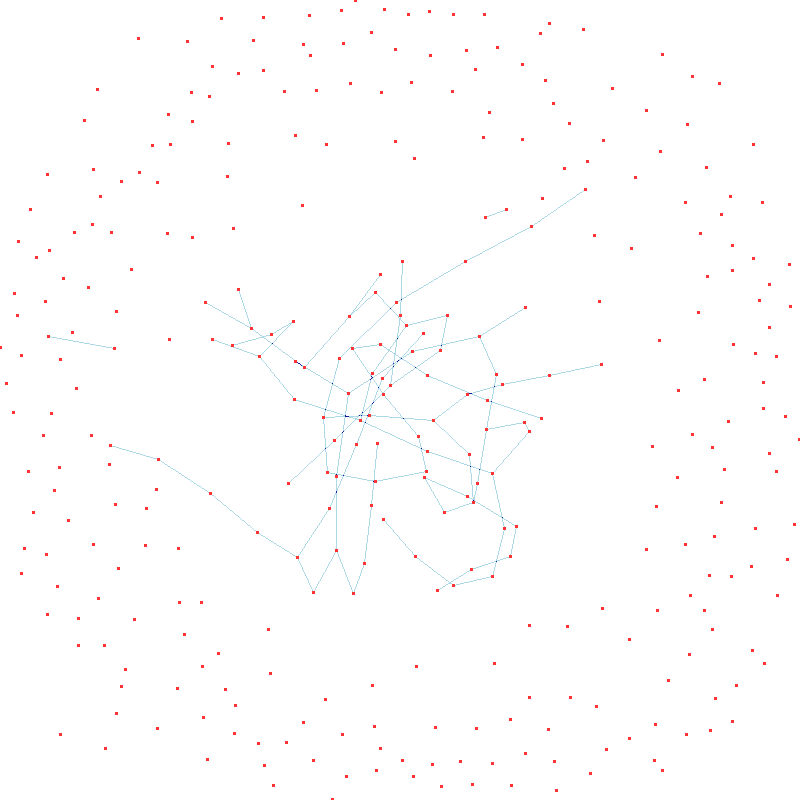
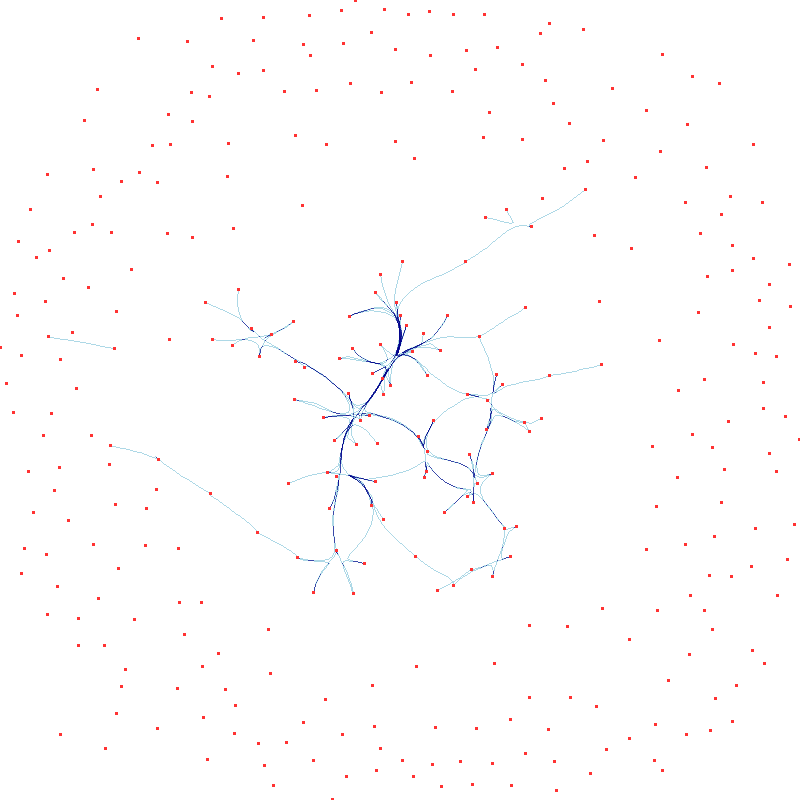

In [16]:
tf.Images(fd_d,fd_b).cols(2)

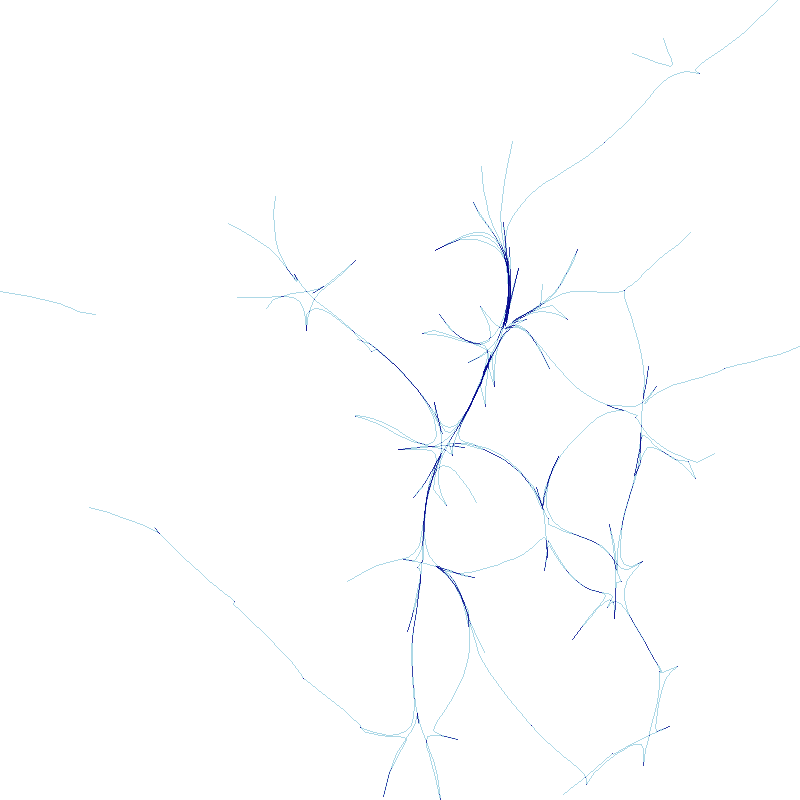

In [17]:
tf.Image(edgesplot(hammer_bundle(fd,edges)))